# Theory Computing - Neutron Stars: Notebook 1
<div style="text-align: right"> Jude McClay and Rasheed Miladi </div>

Initially, we will attempt to solve these two coupled Ordinary Differential Equations (ODEs):

$\frac{dm(r)}{dr} = 4\pi r^2\rho$ (1)

$\frac{dP}{dr} = \frac{-Gm(r)\rho (r)}{r^2}$. (2)

These can be combined to produce a single, second-order differential equation:

$\frac{1}{r^2}\frac{d}{dr}(\frac{r^2}{\rho}\frac{dP}{dr})=-4\pi G\rho$ (3)

We now introduce the Polytropic relation, given by

$P=K\rho^{\gamma}$, where $\gamma = 1+\frac{1}{n}$, and where $n$ is a constant parameter known as the polytropic index. Different values of $n$ can be suitable for modeling different massive bodies: neutron stars are modelled well by $n$ values between $0.5$ and $1.0$.

We can use this relation to rewrite Equation 3 in terms of $\rho$ and $r$ only, eliminating the pressure, $P$: since
$\frac{dP}{dr} = \frac{dP}{d\rho}\frac{d\rho}{dr}$,
it follows that
$\Longrightarrow \frac{1}{r^2}\frac{d}{dr}(\frac{Kr^2}{\rho}\rho^{\gamma - 1}\frac{d\rho}{dr})=-4\pi G\rho$. (4)

From here, we can introduce some dimensionless parameters to simplify the problem:

$r=ax$, and $\rho = \rho_c x^n$, where $a$ is a constant, $\rho_c$ is the central pressure of the body, and $x$ is a dimensionless density function [citation].

Tomorrow: $\rho$ as a function of $r$ and $m$ as a function of $r$. 


In [6]:
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt
from scipy import constants
from scipy.integrate import odeint
from scipy.integrate import ode
from scipy.integrate import solve_ivp

from matplotlib import rc
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

rcParams['figure.dpi'] = 100
%matplotlib inline

In [7]:
#Define constants

In [8]:

#Equation we want to solve

def model(y, t, n):
    """
    {y} = array containing x and dx/dt, where x is the unitless density, and t is the unitless distance from the centre

    {t} = float.
    """
       
    #n = 1
    x = y[0]
    dxdt = y[1] # z = dx/dt.
    
    x_dot = [[],[]]
    x_dot[0] = dxdt
    try:
        
        x_dot[1] = -((2/t) * dxdt + np.abs(x)**n)
    
    except ZeroDivisionError or ValueError:
        
        x_dot[1] = -(2 + np.abs(x)**n)
    
    return x_dot

h = 0.01
t_initial = 0.
t_final = 100.
t_values = np.linspace(0, 16, 100)

    

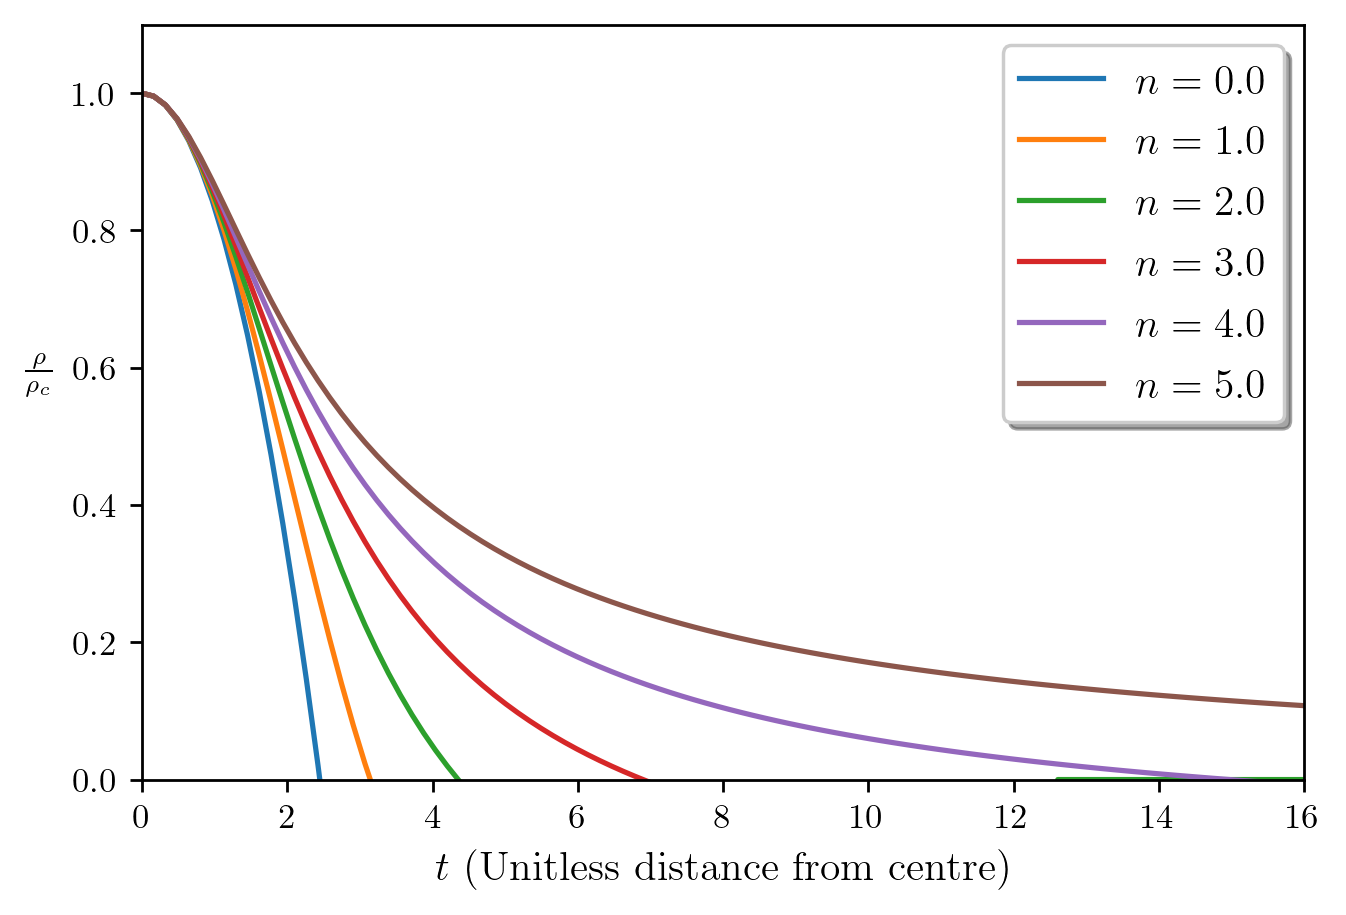

In [9]:
def solve_and_plot(t_values):
    
    fig1 = plt.figure(dpi = 250)
    ax1 = fig1.add_subplot(111)
    
    ax1.set_ylim(bottom=0., top = 1.1)
    
    data_points = np.empty([0, len(t_values)])
    
    for i in np.arange(0, 6, 1):
        
        solution_points = odeint(model, [1,0], t_values, (i,)) #array contains initial conditions for x and dx/dt
        
        ax1.plot(t_values, solution_points[:,0], label = '$n = {0:1.1f}$'.format(i))
        
        data_points = np.vstack((data_points, solution_points[:,0]))
        
    ax1.legend(loc='upper right', shadow=True, fontsize='large')
    
    ax1.set_xlabel("$t$ (unitless distance from centre)", fontsize = "large")
    ax1.set_ylabel("$\\frac{\\rho}{\\rho_c}$", rotation = 0, labelpad = 10)
    
    ax1.margins(x = 0)
    
    plt.show()

    return data_points

data_points = solve_and_plot(t_values)

#print(data_points)


The density for $n = 5$ never reaches 0, and hence can describe a body of infinite radius.

In [10]:
"""
def model(t, y, n):
    
    {y} = array containing x and dx/dt, where x is the unitless density, and t is the unitless distance from the centre

    {t} = float.

      
    #n = 1
    x = y[0]
    dxdt = y[1] # z = dx/dt.
    
    x_dot = [[],[]]
    x_dot[0] = dxdt
    try:
        
        x_dot[1] = -((2/t) * dxdt + x**n)
    
    except ZeroDivisionError or ValueError:
        
        x_dot[1] = -(2 + x**n)
    
    return x_dot

h = 0.02
#t_initial = 0.
#t_final = 4.
#t_values = np.linspace(0, t_final, t_final / h)



def solve_and_plot(step_size):
    
    fig1 = plt.figure(dpi = 250)
    ax1 = fig1.add_subplot(111)
    
    ax1.set_ylim(bottom=0., top = 1.1)
    
    t_values = np.array([])
    x_values = np.array([])
    
    #data_points = np.empty([0, len(t_values)])
    
    
    for i in np.arange(0.5, 1., 0.1):
        
        r = ode(model)
        
        r.set_initial_value(0, 1)
        
        while r.successful() and r.y >= 0:
            
            temp_t = r.t + step_size
            t_values = np.append(t_values, temp_t)
            
            temp_x = r.integrate(r.t + step_size) 
            x_values = np.append(x_values, temp_x)
        
        ax1.plot(t_values, solution_points[:,0], label = '$n = {0:1.0f}$'.format(i))
        
        #data_points = np.vstack((data_points, solution_points[:,0]))
        
    #ax1.plot(t_values, solution_points[:,1], label = '$\\frac{dx}{dt}$')

    
    ax1.legend(loc='upper right', shadow=True, fontsize='large')
    ax1.set_xlabel("$t$ (Unitless distance from centre)", fontsize = "large")
    ax1.set_ylabel("$\\frac{\\rho}{\\rho_c}$", rotation = 0, labelpad = 10)
    plt.show()

    #return data_points

#data_points = solve_and_plot(t_values)

#print(data_points)

solve_and_plot(h)
"""

'\ndef model(t, y, n):\n    \n    {y} = array containing x and dx/dt, where x is the unitless density, and t is the unitless distance from the centre\n\n    {t} = float.\n\n      \n    #n = 1\n    x = y[0]\n    dxdt = y[1] # z = dx/dt.\n    \n    x_dot = [[],[]]\n    x_dot[0] = dxdt\n    try:\n        \n        x_dot[1] = -((2/t) * dxdt + x**n)\n    \n    except ZeroDivisionError or ValueError:\n        \n        x_dot[1] = -(2 + x**n)\n    \n    return x_dot\n\nh = 0.02\n#t_initial = 0.\n#t_final = 4.\n#t_values = np.linspace(0, t_final, t_final / h)\n\n\n\ndef solve_and_plot(step_size):\n    \n    fig1 = plt.figure(dpi = 250)\n    ax1 = fig1.add_subplot(111)\n    \n    ax1.set_ylim(bottom=0., top = 1.1)\n    \n    t_values = np.array([])\n    x_values = np.array([])\n    \n    #data_points = np.empty([0, len(t_values)])\n    \n    \n    for i in np.arange(0.5, 1., 0.1):\n        \n        r = ode(model)\n        \n        r.set_initial_value(0, 1)\n        \n        while r.successfu